# Mod 4 Project - Starter Notebook

This notebook has been provided to you so that you can make use of the following starter code to help with the trickier parts of preprocessing the Zillow dataset. 

The notebook contains a rough outline the general order you'll likely want to take in this project. You'll notice that most of the areas are left blank. This is so that it's more obvious exactly when you should make use of the starter code provided for preprocessing. 

**_NOTE:_** The number of empty cells are not meant to infer how much or how little code should be involved in any given step--we've just provided a few for your convenience. Add, delete, and change things around in this notebook as needed!

# Some Notes Before Starting

This project will be one of the more challenging projects you complete in this program. This is because working with Time Series data is a bit different than working with regular datasets. In order to make this a bit less frustrating and help you understand what you need to do (and when you need to do it), we'll quickly review the dataset formats that you'll encounter in this project. 

## Wide Format vs Long Format

If you take a look at the format of the data in `zillow_data.csv`, you'll notice that the actual Time Series values are stored as separate columns. Here's a sample: 

<img src='~/../images/df_head.png'>

You'll notice that the first seven columns look like any other dataset you're used to working with. However, column 8 refers to the median housing sales values for April 1996, column 9 for May 1996, and so on. This This is called **_Wide Format_**, and it makes the dataframe intuitive and easy to read. However, there are problems with this format when it comes to actually learning from the data, because the data only makes sense if you know the name of the column that the data can be found it. Since column names are metadata, our algorithms will miss out on what dates each value is for. This means that before we pass this data to our ARIMA model, we'll need to reshape our dataset to **_Long Format_**. Reshaped into long format, the dataframe above would now look like:

<img src='~/../images/melted1.png'>

There are now many more rows in this dataset--one for each unique time and zipcode combination in the data! Once our dataset is in this format, we'll be able to train an ARIMA model on it. The method used to convert from Wide to Long is `pd.melt()`, and it is common to refer to our dataset as 'melted' after the transition to denote that it is in long format. 

# Helper Functions Provided

Melting a dataset can be tricky if you've never done it before, so you'll see that we have provided a sample function, `melt_data()`, to help you with this step below. Also provided is:

* `get_datetimes()`, a function to deal with converting the column values for datetimes as a pandas series of datetime objects
* Some good parameters for matplotlib to help make your visualizations more readable. 

Good luck!


# Step 1: Load the Data/Filtering for Chosen Zipcodes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('zillow_data.csv')

df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


In [4]:
df.rename(columns={'RegionName':'ZipCode'}, inplace=True)
df.drop('RegionID', axis=1, inplace=True)

# Step 2: Data Preprocessing

In [5]:
def get_datetimes(df):
    return pd.to_datetime(df.columns.values[6:], format='%Y-%m')

In [6]:
df.columns.values[6:] = get_datetimes(df)

In [7]:
df.head()

,ZipCode,City,State,Metro,CountyName,SizeRank,1996-04-01 00:00:00,1996-05-01 00:00:00,1996-06-01 00:00:00,1996-07-01 00:00:00,...,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,2017-11-01 00:00:00,2017-12-01 00:00:00,2018-01-01 00:00:00,2018-02-01 00:00:00,2018-03-01 00:00:00,2018-04-01 00:00:00
0,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,337600.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,235400.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,210700.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,504600.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


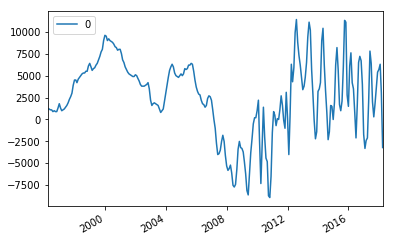

In [8]:
df.loc[df.ZipCode == 60657, df.columns[6:]].T.diff(periods=1).plot()

In [9]:
#plt.figure(figsize=(12,20))

zip_means = {}
for zipcode in df.ZipCode:
    data = df.loc[df.ZipCode == zipcode, df.columns[6:]].T.values
    zip_means[zipcode] = data.mean()
    #plt.plot(data.index, data.values)


In [10]:
sorted_zips = sorted(zip_means, key=zip_means.get, reverse=True)
sorted_zips

[10011,
 10128,
 94109,
 90020,
 33139,
 94118,
 94904,
 90046,
 98004,
 60614,
 7030,
 94002,
 90005,
 94539,
 33160,
 90004,
 94403,
 96822,
 60610,
 94110,
 60657,
 90803,
 20854,
 90066,
 95124,
 90034,
 96816,
 92677,
 11222,
 11209,
 11375,
 90028,
 11211,
 90503,
 94501,
 92692,
 92708,
 90026,
 11235,
 10456,
 60613,
 11230,
 20009,
 60640,
 11355,
 11214,
 98052,
 11226,
 94558,
 11373,
 91709,
 11377,
 11229,
 11221,
 10463,
 92683,
 98065,
 11385,
 11234,
 95630,
 91910,
 90250,
 78704,
 10314,
 20002,
 60625,
 60618,
 75034,
 90650,
 10462,
 2169,
 60647,
 10467,
 8701,
 90805,
 77479,
 94565,
 77494,
 11212,
 28277,
 30024,
 90044,
 75287,
 77077,
 75070,
 33411,
 78613,
 23464,
 33025,
 37075,
 77433,
 77584,
 66062,
 77379,
 32162,
 77573,
 77429,
 75243,
 85032,
 78745,
 30043,
 78660,
 48197,
 21234,
 30096,
 23462,
 79912,
 78130,
 75067,
 63376,
 28269,
 37211,
 60629,
 85710,
 37013,
 78666,
 30044,
 75052,
 77036,
 77449,
 44107,
 30281,
 77084,
 60619,
 78245,
 73

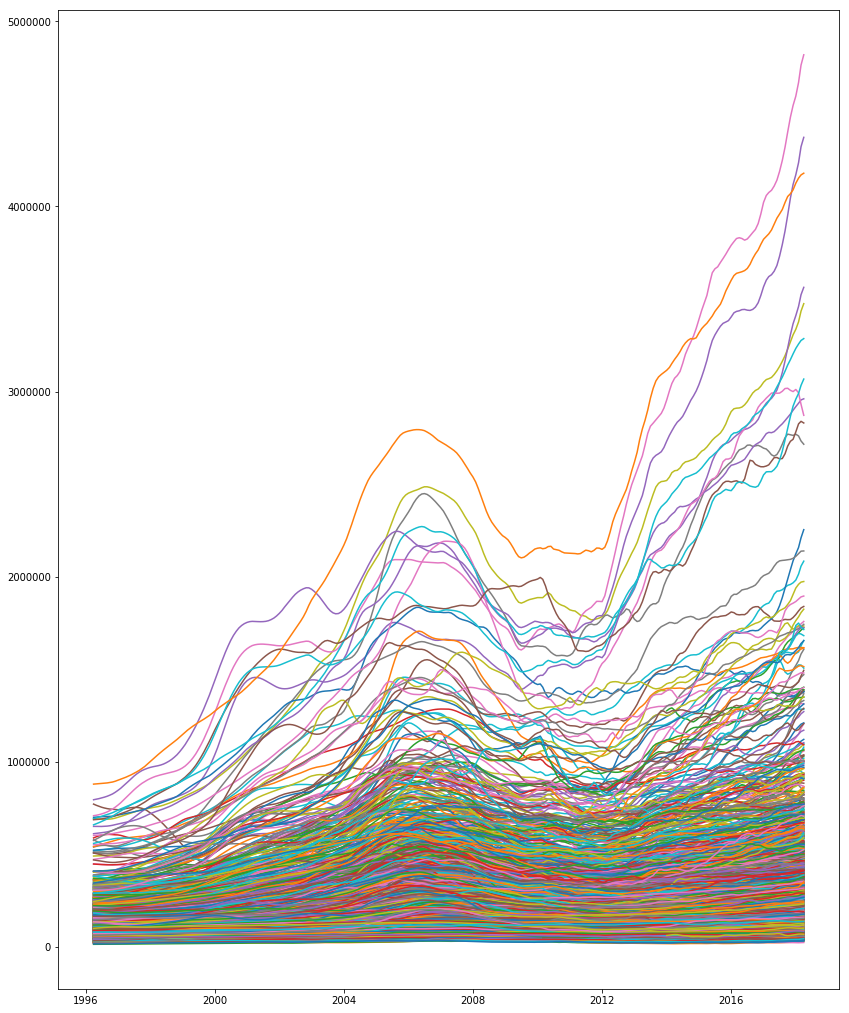

In [11]:
plt.figure(figsize=(14,18))

for zipcode in sorted_zips[5000:7500]:
    data = df.loc[df.ZipCode == zipcode, df.columns[6:]].T
    plt.plot(data.index, data.values)

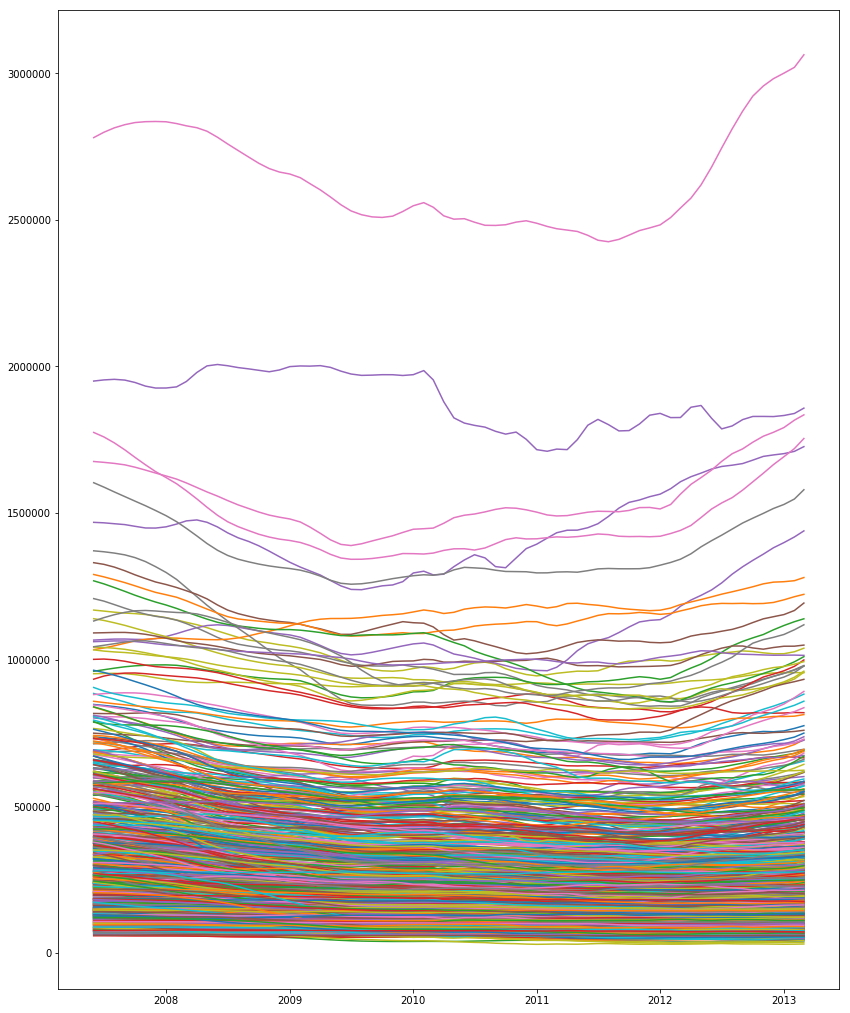

In [12]:
plt.figure(figsize=(14,18))

for zipcode in sorted_zips[2000:3000]:
    data = df.loc[df.ZipCode == zipcode, df.columns[140:210]].T
    plt.plot(data.index, data.values)

# Step 3: EDA and Visualization

In [13]:
# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : 22}

# matplotlib.rc('font', **font)

# NOTE: if you visualizations are too cluttered to read, try calling 'plt.gcf().autofmt_xdate()'!

In [14]:
df.head()

,ZipCode,City,State,Metro,CountyName,SizeRank,1996-04-01 00:00:00,1996-05-01 00:00:00,1996-06-01 00:00:00,1996-07-01 00:00:00,...,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,2017-11-01 00:00:00,2017-12-01 00:00:00,2018-01-01 00:00:00,2018-02-01 00:00:00,2018-03-01 00:00:00,2018-04-01 00:00:00
0,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,337600.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,235400.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,210700.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,504600.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


1. profit-margin (low value)
2. profit-margin (medium value)
3. profit-margin (high value)
4. low-risk (low value)
5. low-risk (high value)

In [15]:
df.columns[6]

Timestamp('1996-04-01 00:00:00')

In [16]:
df['total_pct_change'] = (df[df.columns[-1]] - df[df.columns[6]])/df[df.columns[6]]*100

In [17]:
df.head()

,ZipCode,City,State,Metro,CountyName,SizeRank,1996-04-01 00:00:00,1996-05-01 00:00:00,1996-06-01 00:00:00,1996-07-01 00:00:00,...,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,2017-11-01 00:00:00,2017-12-01 00:00:00,2018-01-01 00:00:00,2018-02-01 00:00:00,2018-03-01 00:00:00,2018-04-01 00:00:00,total_pct_change
0,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,337600.0,...,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600,208.378217
1,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,235400.0,...,310000,312500,314100,315000,316600,318100,319600,321100,321800,36.529487
2,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,210700.0,...,320600,320200,320400,320800,321200,321200,323000,326900,329900,56.796578
3,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,504600.0,...,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000,162.397109
4,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,77300.0,...,119400,120000,120300,120300,120300,120300,120500,121000,121500,57.179819


In [18]:
df.set_index('ZipCode', inplace=True)

In [19]:

top50_total_pct_increase = df['total_pct_change'].sort_values(ascending=False).head(50).to_dict()
top50_total_pct_increase

{11211: 1118.993993993994,
 11222: 1053.5522788203752,
 11216: 994.2505133470225,
 7302: 940.3061224489796,
 11215: 894.1958351794417,
 11975: 892.2174535050071,
 11930: 856.4859926918393,
 80449: 792.3333333333333,
 90291: 777.8489116517285,
 20001: 762.2826086956522,
 11932: 727.6181353767561,
 11976: 710.35,
 57110: 710.2990033222591,
 19125: 704.601226993865,
 2120: 702.9545454545454,
 19951: 702.608695652174,
 11221: 684.3679880329095,
 30317: 655.984555984556,
 78702: 655.0359712230215,
 29403: 652.3577235772358,
 94306: 645.5969133000453,
 94110: 645.20804114072,
 28762: 644.7916666666667,
 11963: 644.6374294398611,
 2119: 643.9767779390421,
 20002: 633.085896076352,
 94303: 630.4034197168047,
 90038: 614.8823529411765,
 94043: 611.3129928008227,
 11937: 610.8221086855551,
 20010: 604.2533936651583,
 90026: 603.9102099927588,
 90048: 599.7011952191235,
 19147: 594.1176470588235,
 90028: 591.0574018126888,
 11218: 588.9954853273138,
 94040: 587.1974830590514,
 80205: 585.56851311

In [20]:
high_price_zips = sorted_zips[:5000]
medium_price_zips = sorted_zips[5000:10000]
low_price_zips = sorted_zips[10000:]

In [21]:
top_5_high_tot = []
top_5_med_tot = []
top_5_low_tot = []

for zipcode in top50_total_pct_increase:
    if (zipcode in high_price_zips):
        top_5_high_tot.append((zipcode, top50_total_pct_increase[zipcode]))
    if (zipcode in medium_price_zips):
        top_5_med_tot.append((zipcode, top50_total_pct_increase[zipcode]))
    if (zipcode in low_price_zips):
        top_5_low_tot.append((zipcode, top50_total_pct_increase[zipcode]))

In [22]:
top_5_high_tot = top_5_high_tot[:5]
top_5_med_tot = top_5_med_tot[:5]
top_5_low_tot = top_5_low_tot[:5]

In [23]:
df.State.index

Int64Index([60657, 75070, 77494, 60614, 79936, 77084, 10467, 60640, 77449,
            94109,
            ...
             3765, 84781, 12429, 97028, 12720,  1338,  3293, 40404, 81225,
            89155],
           dtype='int64', name='ZipCode', length=14723)

In [24]:
col = df.pop('total_pct_change') # df.pop('F') # if you want it removed
df.insert(5, col.name, col)

In [25]:
df.head()

,City,State,Metro,CountyName,SizeRank,total_pct_change,1996-04-01 00:00:00,1996-05-01 00:00:00,1996-06-01 00:00:00,1996-07-01 00:00:00,...,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,2017-11-01 00:00:00,2017-12-01 00:00:00,2018-01-01 00:00:00,2018-02-01 00:00:00,2018-03-01 00:00:00,2018-04-01 00:00:00
ZipCode,,,,,,,,,,,,,,,,,,,,,
60657,Chicago,IL,Chicago,Cook,1,208.378217,334200.0,335400.0,336500.0,337600.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
75070,McKinney,TX,Dallas-Fort Worth,Collin,2,36.529487,235700.0,236900.0,236700.0,235400.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
77494,Katy,TX,Houston,Harris,3,56.796578,210400.0,212200.0,212200.0,210700.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
60614,Chicago,IL,Chicago,Cook,4,162.397109,498100.0,500900.0,503100.0,504600.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
79936,El Paso,TX,El Paso,El Paso,5,57.179819,77300.0,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [26]:
df.columns[210]

Timestamp('2013-04-01 00:00:00')

In [27]:
df['5_year_pct_change'] = (df[df.columns[-1]] - df[df.columns[210]])/df[df.columns[210]]*100

In [28]:
df.head()

,City,State,Metro,CountyName,SizeRank,total_pct_change,1996-04-01 00:00:00,1996-05-01 00:00:00,1996-06-01 00:00:00,1996-07-01 00:00:00,...,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,2017-11-01 00:00:00,2017-12-01 00:00:00,2018-01-01 00:00:00,2018-02-01 00:00:00,2018-03-01 00:00:00,2018-04-01 00:00:00,5_year_pct_change
ZipCode,,,,,,,,,,,,,,,,,,,,,
60657,Chicago,IL,Chicago,Cook,1,208.378217,334200.0,335400.0,336500.0,337600.0,...,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600,26.082701
75070,McKinney,TX,Dallas-Fort Worth,Collin,2,36.529487,235700.0,236900.0,236700.0,235400.0,...,310000,312500,314100,315000,316600,318100,319600,321100,321800,53.384175
77494,Katy,TX,Houston,Harris,3,56.796578,210400.0,212200.0,212200.0,210700.0,...,320600,320200,320400,320800,321200,321200,323000,326900,329900,28.315830
60614,Chicago,IL,Chicago,Cook,4,162.397109,498100.0,500900.0,503100.0,504600.0,...,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000,25.878840
79936,El Paso,TX,El Paso,El Paso,5,57.179819,77300.0,77300.0,77300.0,77300.0,...,119400,120000,120300,120300,120300,120300,120500,121000,121500,7.048458


In [29]:
top50_5_yr_pct_increase = df['5_year_pct_change'].sort_values(ascending=False).head(50).to_dict()
top50_5_yr_pct_increase

{80216: 173.87295081967213,
 94601: 167.94326241134752,
 48240: 161.22448979591837,
 94590: 159.3793103448276,
 33705: 159.21052631578948,
 37210: 155.9322033898305,
 33460: 153.6470588235294,
 15201: 147.59358288770053,
 11216: 147.5917608796655,
 37207: 146.68304668304668,
 33461: 146.33540372670808,
 33435: 144.7608200455581,
 33415: 144.61343472750318,
 32807: 144.41524310118265,
 33030: 144.16761041902603,
 34207: 141.49560117302053,
 33056: 140.6478578892372,
 94606: 140.1102687801516,
 30316: 140.08810572687224,
 85035: 139.9403874813711,
 33055: 139.64049195837276,
 34982: 139.0282131661442,
 33033: 138.96103896103895,
 33135: 138.51540616246498,
 94804: 138.21499013806707,
 48237: 137.79816513761466,
 34234: 137.67660910518055,
 80204: 137.14103382259094,
 33830: 135.77817531305902,
 30034: 135.68773234200745,
 94805: 135.56352050975707,
 33404: 135.48951048951048,
 33614: 135.370611183355,
 33713: 135.3548387096774,
 33125: 135.16209476309226,
 93505: 135.09060955518945,
 331

In [30]:
top_5_high_5_yr = []
top_5_med_5_yr = []
top_5_low_5_yr = []

for zipcode in top50_5_yr_pct_increase:
    if (zipcode in high_price_zips):
        top_5_high_5_yr.append((zipcode, top50_5_yr_pct_increase[zipcode]))
    if (zipcode in medium_price_zips):
        top_5_med_5_yr.append((zipcode, top50_5_yr_pct_increase[zipcode]))
    if (zipcode in low_price_zips):
        top_5_low_5_yr.append((zipcode, top50_5_yr_pct_increase[zipcode]))
        
top_5_high_5_yr = top_5_high_5_yr[:5]
top_5_med_5_yr = top_5_med_5_yr[:5]
top_5_low_5_yr = top_5_low_5_yr[:5]

In [31]:
col = df.pop('5_year_pct_change') # df.pop('F') # if you want it removed
df.insert(5, col.name, col)

In [32]:
df.head()

,City,State,Metro,CountyName,SizeRank,5_year_pct_change,total_pct_change,1996-04-01 00:00:00,1996-05-01 00:00:00,1996-06-01 00:00:00,...,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,2017-11-01 00:00:00,2017-12-01 00:00:00,2018-01-01 00:00:00,2018-02-01 00:00:00,2018-03-01 00:00:00,2018-04-01 00:00:00
ZipCode,,,,,,,,,,,,,,,,,,,,,
60657,Chicago,IL,Chicago,Cook,1,26.082701,208.378217,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
75070,McKinney,TX,Dallas-Fort Worth,Collin,2,53.384175,36.529487,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
77494,Katy,TX,Houston,Harris,3,28.315830,56.796578,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
60614,Chicago,IL,Chicago,Cook,4,25.878840,162.397109,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
79936,El Paso,TX,El Paso,El Paso,5,7.048458,57.179819,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [33]:
df.columns[148]

Timestamp('2008-01-01 00:00:00')

In [34]:
df.columns[196]

Timestamp('2012-01-01 00:00:00')

In [35]:
df['recession_pct_change'] = (df[df.columns[196]] - df[df.columns[148]])/df[df.columns[148]]*100

In [36]:
df.head()

,City,State,Metro,CountyName,SizeRank,5_year_pct_change,total_pct_change,1996-04-01 00:00:00,1996-05-01 00:00:00,1996-06-01 00:00:00,...,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,2017-11-01 00:00:00,2017-12-01 00:00:00,2018-01-01 00:00:00,2018-02-01 00:00:00,2018-03-01 00:00:00,2018-04-01 00:00:00,recession_pct_change
ZipCode,,,,,,,,,,,,,,,,,,,,,
60657,Chicago,IL,Chicago,Cook,1,26.082701,208.378217,334200.0,335400.0,336500.0,...,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600,-16.332086
75070,McKinney,TX,Dallas-Fort Worth,Collin,2,53.384175,36.529487,235700.0,236900.0,236700.0,...,310000,312500,314100,315000,316600,318100,319600,321100,321800,-6.685367
77494,Katy,TX,Houston,Harris,3,28.315830,56.796578,210400.0,212200.0,212200.0,...,320600,320200,320400,320800,321200,321200,323000,326900,329900,-2.164502
60614,Chicago,IL,Chicago,Cook,4,25.878840,162.397109,498100.0,500900.0,503100.0,...,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000,-20.128977
79936,El Paso,TX,El Paso,El Paso,5,7.048458,57.179819,77300.0,77300.0,77300.0,...,119400,120000,120300,120300,120300,120300,120500,121000,121500,-14.329268


In [37]:
top50_recession_pct_increase = df['recession_pct_change'].sort_values(ascending=False).head(50).to_dict()
top50_recession_pct_increase

{38388: 47.53694581280788,
 58801: 42.97520661157025,
 71047: 40.86317722681359,
 58318: 30.662557781201848,
 58703: 29.239357990230285,
 16686: 29.043683589138137,
 73128: 28.01358234295416,
 18832: 27.971188475390157,
 73099: 26.524953789279117,
 17017: 26.35574837310195,
 73064: 26.147186147186147,
 62573: 26.124197002141326,
 58701: 25.14071294559099,
 43464: 25.087108013937282,
 73078: 24.943988050784167,
 10011: 24.917352465358373,
 71268: 24.131944444444446,
 47220: 24.046242774566473,
 47281: 23.711340206185564,
 99301: 23.5929067077872,
 14222: 23.541147132169577,
 16673: 23.333333333333332,
 58563: 23.076923076923077,
 16947: 22.63948497854077,
 18848: 22.539370078740156,
 14889: 22.52906976744186,
 16617: 22.31920199501247,
 74729: 22.18978102189781,
 68788: 22.153465346534652,
 16950: 21.884984025559106,
 13679: 21.688159437280188,
 45308: 21.62162162162162,
 55952: 20.909090909090907,
 36874: 20.76271186440678,
 72830: 20.434782608695652,
 43410: 20.081411126187245,
 72137

In [38]:
col = df.pop('recession_pct_change') # df.pop('F') # if you want it removed
df.insert(5, col.name, col)

In [39]:
df.head()

,City,State,Metro,CountyName,SizeRank,recession_pct_change,5_year_pct_change,total_pct_change,1996-04-01 00:00:00,1996-05-01 00:00:00,...,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,2017-11-01 00:00:00,2017-12-01 00:00:00,2018-01-01 00:00:00,2018-02-01 00:00:00,2018-03-01 00:00:00,2018-04-01 00:00:00
ZipCode,,,,,,,,,,,,,,,,,,,,,
60657,Chicago,IL,Chicago,Cook,1,-16.332086,26.082701,208.378217,334200.0,335400.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
75070,McKinney,TX,Dallas-Fort Worth,Collin,2,-6.685367,53.384175,36.529487,235700.0,236900.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
77494,Katy,TX,Houston,Harris,3,-2.164502,28.315830,56.796578,210400.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
60614,Chicago,IL,Chicago,Cook,4,-20.128977,25.878840,162.397109,498100.0,500900.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
79936,El Paso,TX,El Paso,El Paso,5,-14.329268,7.048458,57.179819,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [40]:
alltops = top_5_high_5_yr+top_5_high_tot+top_5_low_5_yr+top_5_low_tot+top_5_med_5_yr+top_5_med_tot
alltops = [x for x,y in alltops]
alltops

[94601,
 94590,
 33705,
 33460,
 11216,
 11211,
 11222,
 11216,
 7302,
 11215,
 11975,
 11930,
 80449,
 11932,
 11976,
 80216,
 48240,
 37210,
 15201,
 94805,
 57110,
 2120,
 30317,
 28762,
 11963]

In [41]:
recession_positive = df.loc[(df['recession_pct_change']>0)]
recession_positive

,City,State,Metro,CountyName,SizeRank,recession_pct_change,5_year_pct_change,total_pct_change,1996-04-01 00:00:00,1996-05-01 00:00:00,...,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,2017-11-01 00:00:00,2017-12-01 00:00:00,2018-01-01 00:00:00,2018-02-01 00:00:00,2018-03-01 00:00:00,2018-04-01 00:00:00
ZipCode,,,,,,,,,,,,,,,,,,,,,
10011,New York,NY,New York,New York,21,24.917352,45.954503,NaN,NaN,NaN,...,12137600,12112600,12036600,12050100,12016300,11946500,11978100,11849300,11563000,11478300
10128,New York,NY,New York,New York,22,11.486426,33.594979,100.902984,3676700.0,3704200.0,...,7410100,7422400,7417600,7427300,7371400,7342700,7353300,7350300,7363000,7386600
37042,Clarksville,TN,Clarksville,Montgomery,38,4.903678,11.158433,81.250000,72000.0,73100.0,...,125200,125100,125000,125300,126100,127000,127900,129000,129900,130500
73099,Yukon,OK,Oklahoma City,Canadian,44,26.524954,14.975160,94.945848,83100.0,83800.0,...,160400,160200,159800,159900,160000,160000,160300,161000,161600,162000
75287,Dallas,TX,Dallas-Fort Worth,Dallas,55,0.707339,44.564280,81.724512,184400.0,183300.0,...,319600,322300,325000,325900,326200,326700,328000,330800,333900,335100
11214,New York,NY,New York,Kings,59,5.153846,46.443442,341.937173,191000.0,191200.0,...,798000,805700,814200,820600,825000,826300,827600,830500,837300,844100
77077,Houston,TX,Houston,Harris,64,1.044139,34.197111,78.373800,177100.0,180000.0,...,309600,310000,310800,311600,311800,311200,310500,311400,313800,315900
78745,Austin,TX,Austin,Travis,99,1.187648,62.458655,118.296296,135000.0,134200.0,...,286300,286900,287500,288700,289800,290500,291300,292600,294000,294700
11215,New York,NY,New York,Kings,107,2.791082,67.805863,894.195835,225700.0,227500.0,...,2173600,2201100,2244400,2266100,2275800,2287100,2288900,2265300,2244900,2243900


In [42]:
recession_positive.loc[alltops]

C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


,City,State,Metro,CountyName,SizeRank,recession_pct_change,5_year_pct_change,total_pct_change,1996-04-01 00:00:00,1996-05-01 00:00:00,...,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,2017-11-01 00:00:00,2017-12-01 00:00:00,2018-01-01 00:00:00,2018-02-01 00:00:00,2018-03-01 00:00:00,2018-04-01 00:00:00
ZipCode,,,,,,,,,,,,,,,,,,,,,
94601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94590,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33705,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11211,New York,NY,New York,Kings,118.0,6.648071,106.867117,1118.993994,133200.0,132900.0,...,1405100.0,1406400.0,1424700.0,1435300.0,1440500.0,1463100.0,1496100.0,1531100.0,1581900.0,1623700.0
11222,New York,NY,New York,Kings,1156.0,9.925971,118.247527,1053.552279,149200.0,148400.0,...,1598000.0,1623800.0,1638700.0,1640400.0,1644100.0,1651200.0,1661800.0,1672800.0,1694000.0,1721100.0
11216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


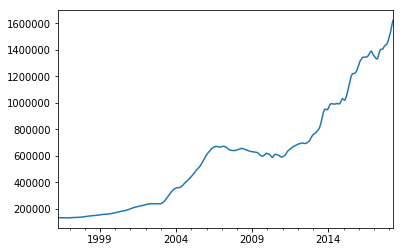

In [43]:
df.loc[11211, df.columns[8:]].T.plot()

In [44]:
df[df.columns[5:8]].describe()

,recession_pct_change,5_year_pct_change,total_pct_change
count,14116.000000,14572.000000,13684.000000
mean,-18.087513,33.657962,132.560521
std,14.668508,23.750621,86.601907
min,-73.321343,-29.672650,-53.260870
25%,-26.704012,16.898228,78.569073
50%,-16.186144,28.313301,113.948445
75%,-7.751572,45.467508,161.983287
max,47.536946,173.872951,1118.993994


any zipcodes in top 25% of all 3?

In [45]:
df.loc[(df['recession_pct_change']>-5) & (df['5_year_pct_change']>75) & (df['total_pct_change']>300)]

,City,State,Metro,CountyName,SizeRank,recession_pct_change,5_year_pct_change,total_pct_change,1996-04-01 00:00:00,1996-05-01 00:00:00,...,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,2017-11-01 00:00:00,2017-12-01 00:00:00,2018-01-01 00:00:00,2018-02-01 00:00:00,2018-03-01 00:00:00,2018-04-01 00:00:00
ZipCode,,,,,,,,,,,,,,,,,,,,,
11211,New York,NY,New York,Kings,118,6.648071,106.867117,1118.993994,133200.0,132900.0,...,1405100,1406400,1424700,1435300,1440500,1463100,1496100,1531100,1581900,1623700
11222,New York,NY,New York,Kings,1156,9.925971,118.247527,1053.552279,149200.0,148400.0,...,1598000,1623800,1638700,1640400,1644100,1651200,1661800,1672800,1694000,1721100
2127,Boston,MA,Boston,Suffolk,1512,-1.780264,85.043518,548.394864,124600.0,125000.0,...,719400,724500,731000,739000,748800,759100,764900,776600,795000,807900
2139,Cambridge,MA,Boston,Middlesex,1774,4.653840,97.799686,551.482353,212500.0,214400.0,...,1234700,1248100,1259200,1278600,1303600,1325000,1342600,1369600,1386300,1384400
80205,Denver,CO,Denver,Denver,1844,-3.418014,88.951386,585.568513,68600.0,68900.0,...,430700,433300,435800,439000,442700,447700,452300,457500,464500,470300
11102,New York,NY,New York,Queens,2044,-3.003356,84.000662,559.608541,168600.0,169500.0,...,1013200,1015800,1010800,1008000,1027500,1053700,1071500,1072700,1088200,1112100
94303,Palo Alto,CA,San Jose,Santa Clara,2055,5.328021,86.118864,630.403420,374300.0,375900.0,...,2416900,2456800,2522600,2598400,2647600,2657900,2659800,2683900,2718600,2733900
95129,San Jose,CA,San Jose,Santa Clara,2128,-4.997455,83.029830,547.851443,325800.0,327900.0,...,1724100,1758500,1803400,1858100,1914900,1959900,1991000,2023600,2072700,2110700
37206,Nashville,TN,Nashville,Davidson,2811,-3.774834,107.255139,409.361070,67300.0,67300.0,...,333600,334700,336900,339000,338200,336600,336500,337900,340900,342800


In [46]:
bestzips = list(df.loc[(df['recession_pct_change']>-5) & (df['5_year_pct_change']>75) & (df['total_pct_change']>300)].index)

In [47]:
best_high_price = []
best_med_price= []
best_low_price = []

for zipcode in bestzips:
    if (zipcode in high_price_zips):
        best_high_price.append(zipcode)
    if (zipcode in medium_price_zips):
        best_med_price.append(zipcode)
    if (zipcode in low_price_zips):
        best_low_price.append(zipcode)
        

In [48]:
best_low_price

[11932, 95389]

In [49]:
best_med_price

[94024, 94301, 2141, 15201, 2120, 78721, 73103]

In [50]:
best_high_price

[11211,
 11222,
 2127,
 2139,
 80205,
 11102,
 94303,
 95129,
 37206,
 15213,
 94306,
 78702,
 80212]

# Step 4: Reshape from Wide to Long Format

In [51]:
def melt_data(df):
    melted = pd.melt(df, id_vars=['ZipCode', 'City', 'State', 'Metro', 'CountyName', 'SizeRank'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

In [52]:
orig = pd.read_csv('zillow_data.csv')
orig.rename(columns={'RegionName':'ZipCode'}, inplace=True)
orig.drop('RegionID', axis=1, inplace=True)
orig.head()

,ZipCode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,337600.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,235400.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,210700.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,504600.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [53]:
from pandas.plotting import lag_plot

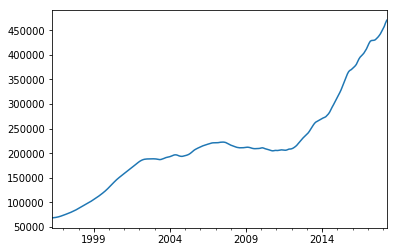

In [54]:
df.loc[80205, df.columns[8:]].T.plot()

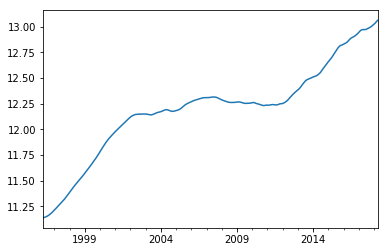

In [55]:
logtest = np.log((df.loc[80205, df.columns[8:]].T).astype(float))
logtest.plot()

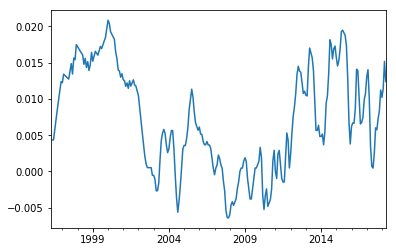

In [56]:
difflogtest = logtest.diff(periods=1)
difflogtest.plot()

In [57]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

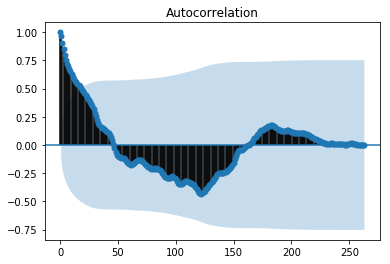

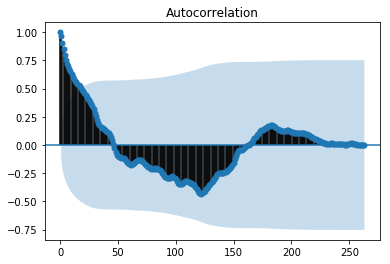

In [58]:
plot_acf(difflogtest.dropna())

C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


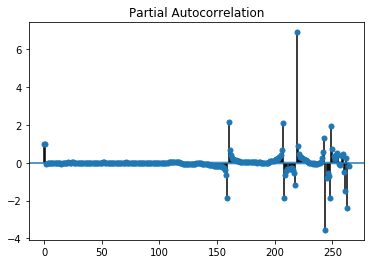

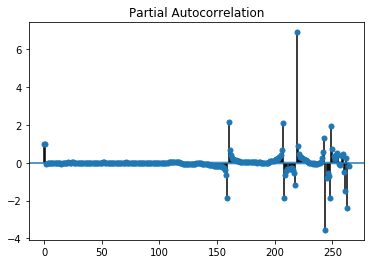

In [59]:
plot_pacf(df.loc[95389, df.columns[8:]].T)

# Step 5: ARIMA Modeling

In [60]:
import itertools
import statsmodels.api as sm

In [61]:
bestzips

[11211,
 11222,
 2127,
 2139,
 80205,
 11102,
 94303,
 95129,
 37206,
 15213,
 94306,
 78702,
 80212,
 94024,
 94301,
 2141,
 15201,
 2120,
 78721,
 73103,
 11932,
 95389]

In [62]:
testcode = 80205
test1 = melt_data(orig[orig['ZipCode']==testcode])
test2 = np.log((df.loc[testcode, df.columns[8:]].T).astype(float))

In [63]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0,6)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

In [64]:
ans = []
for comb in pdq:
    try:
        mod = sm.tsa.statespace.SARIMAX(test2,
                                        order=comb,
                                        enforce_stationarity=False,
                                        enforce_invertibility=False)

        output = mod.fit()
        ans.append([comb, output.aic])
        print('ARIMA {} : AIC Calculated ={}'.format(comb, output.aic))
    except:
        continue
    

C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No

ARIMA (0, 0, 0) : AIC Calculated =2079.894553017447
ARIMA (0, 1, 0) : AIC Calculated =-1672.6822498117417


C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred freque

ARIMA (0, 2, 0) : AIC Calculated =-2591.9327979161417
ARIMA (0, 2, 1) : AIC Calculated =-2660.89207468268


C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 2, 2) : AIC Calculated =-2661.0987840293064
ARIMA (0, 2, 3) : AIC Calculated =-2664.9791963571915


C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 2, 4) : AIC Calculated =-2662.710984698475


C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 2, 5) : AIC Calculated =-2659.0966473575877
ARIMA (0, 3, 0) : AIC Calculated =-2554.6044121970504


C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 3, 1) : AIC Calculated =-2558.3094718764937
ARIMA (0, 3, 2) : AIC Calculated =-2609.5106241133394


C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 3, 3) : AIC Calculated =-2639.6683621642414


C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 3, 4) : AIC Calculated =-2633.790746550435


C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 4, 0) : AIC Calculated =-2347.9340715983853


C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferr

ARIMA (0, 4, 1) : AIC Calculated =nan


C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferr

ARIMA (0, 5, 0) : AIC Calculated =-2081.144507017974


C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 1, 0) : AIC Calculated =-2598.297594754729
ARIMA (1, 1, 1) : AIC Calculated =-2668.9731721403987


C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 1, 2) : AIC Calculated =-2670.242940998056


C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 1, 3) : AIC Calculated =-2672.794593067547


C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 1, 4) : AIC Calculated =-2670.965212118409


C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 1, 5) : AIC Calculated =-2665.764686018473


C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 2, 0) : AIC Calculated =-2647.513453135668
ARIMA (1, 2, 1) : AIC Calculated =-2661.2679285450495


C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 2, 3) : AIC Calculated =-2665.1685048040954


C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 2, 4) : AIC Calculated =-2662.804905881211


C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 2, 5) : AIC Calculated =-2664.0922730838424


C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 3, 0) : AIC Calculated =-2554.568997873526


C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 3, 1) : AIC Calculated =-2575.0589133993717


C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 3, 2) : AIC Calculated =-2617.2972408920295


C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 3, 3) : AIC Calculated =-2633.6909753196815


C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 3, 4) : AIC Calculated =-2632.4821566018845


C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 3, 5) : AIC Calculated =-2635.0037725067564
ARIMA (1, 4, 0) : AIC Calculated =-2384.981434491076


C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred freque

ARIMA (1, 5, 0) : AIC Calculated =-2170.2593236496714
ARIMA (2, 1, 0) : AIC Calculated =-2657.431003494336


C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (2, 1, 1) : AIC Calculated =-2668.655870598235
ARIMA (2, 1, 2) : AIC Calculated =-2668.3712295625137


C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (2, 1, 3) : AIC Calculated =-2671.044955069195


C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (2, 1, 4) : AIC Calculated =-2669.0433973521885


C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (2, 1, 5) : AIC Calculated =-2667.575299265117
ARIMA (2, 2, 0) : AIC Calculated =-2663.7404161372415


C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (2, 2, 1) : AIC Calculated =-2662.2787732123825


C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (2, 2, 3) : AIC Calculated =-2664.738153119327


C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (2, 2, 4) : AIC Calculated =-2662.4581887850245


C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (2, 2, 5) : AIC Calculated =-2662.8597118396738
ARIMA (2, 3, 0) : AIC Calculated =-2585.3800204709787


C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (2, 3, 1) : AIC Calculated =-2597.0878292503853


C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (2, 3, 2) : AIC Calculated =-2615.249420277315


C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (2, 3, 3) : AIC Calculated =-2632.0549659146072


C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (2, 3, 4) : AIC Calculated =-2621.3323992204914


C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (2, 3, 5) : AIC Calculated =-2632.418792794382


C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (2, 4, 0) : AIC Calculated =-2440.144282243864


C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (2, 4, 1) : AIC Calculated =-2513.219666347441


C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (2, 4, 2) : AIC Calculated =-2528.597680902876
ARIMA (2, 5, 0) : AIC Calculated =-2241.722908083676


C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred freque

ARIMA (3, 1, 0) : AIC Calculated =-2671.58023966582


C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (3, 1, 1) : AIC Calculated =-2662.1696480570813


C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (3, 1, 2) : AIC Calculated =-2668.3782244091326


C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (3, 1, 3) : AIC Calculated =-2669.8265854438564


C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (3, 1, 4) : AIC Calculated =-2667.2052065731573
ARIMA (3, 1, 5) : AIC Calculated =-2667.5933680702024
ARIMA (3, 2, 0) : AIC Calculated =-2662.1024853570575


C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (3, 2, 1) : AIC Calculated =-2660.2735859625795


C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (3, 2, 3) : AIC Calculated =-2662.6865389822624


C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (3, 2, 4) : AIC Calculated =-2659.992266101912
ARIMA (3, 2, 5) : AIC Calculated =-2657.621962358091
ARIMA (3, 3, 0) : AIC Calculated =-2590.0178166960177


C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferr

ARIMA (3, 3, 1) : AIC Calculated =-2589.062286104033
ARIMA (3, 3, 4) : AIC Calculated =-2635.9231098210807


C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (3, 3, 5) : AIC Calculated =-2631.6624433404104


C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (3, 4, 0) : AIC Calculated =-2477.673424140107


C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (3, 4, 1) : AIC Calculated =-2494.1790456450826


C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred freque

ARIMA (3, 5, 0) : AIC Calculated =-2321.964473758777


C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (3, 5, 1) : AIC Calculated =-2358.1876941733135


C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (3, 5, 2) : AIC Calculated =-2405.9386826446157


C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred freque

ARIMA (4, 1, 0) : AIC Calculated =-2670.2495077346725


C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (4, 1, 1) : AIC Calculated =-2651.3657223338632


C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (4, 1, 3) : AIC Calculated =-2667.811775075964


C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (4, 1, 4) : AIC Calculated =-2665.096838256397


C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (4, 1, 5) : AIC Calculated =-2666.892403185824
ARIMA (4, 2, 0) : AIC Calculated =-2662.2412819938727


C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (4, 2, 1) : AIC Calculated =-2656.6942727724254


C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (4, 2, 3) : AIC Calculated =-2670.080667407362


C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (4, 2, 4) : AIC Calculated =-2665.6746582784567


C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (4, 2, 5) : AIC Calculated =-2662.934405373286


C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (4, 3, 0) : AIC Calculated =-2589.614083361274


C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferr

ARIMA (4, 3, 1) : AIC Calculated =-2589.3682312209853


C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (4, 3, 4) : AIC Calculated =-2634.409922810368
ARIMA (4, 3, 5) : AIC Calculated =-2631.2877600412303


C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (4, 4, 0) : AIC Calculated =-2481.9970416176047


C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (4, 4, 1) : AIC Calculated =-2500.2199112201524


C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred freque

ARIMA (4, 5, 1) : AIC Calculated =-2369.5787981736557


C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred freque

ARIMA (5, 1, 0) : AIC Calculated =-2669.833501645061
ARIMA (5, 1, 1) : AIC Calculated =-2632.484109219655


C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (5, 1, 3) : AIC Calculated =-2675.6636725799613


C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (5, 1, 4) : AIC Calculated =-2672.5178524458597
ARIMA (5, 1, 5) : AIC Calculated =-2671.8079766141345


C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (5, 2, 0) : AIC Calculated =-2668.320963309553


C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (5, 2, 1) : AIC Calculated =-2665.9752912486247


C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (5, 2, 2) : AIC Calculated =-2664.115301754512


C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (5, 2, 3) : AIC Calculated =-2666.3015431301633


C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (5, 2, 4) : AIC Calculated =-2660.4575251667948


C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (5, 2, 5) : AIC Calculated =-2661.003933218074
ARIMA (5, 3, 0) : AIC Calculated =-2604.5165940392526


C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferr

ARIMA (5, 3, 1) : AIC Calculated =-2605.8283994057047
ARIMA (5, 3, 4) : AIC Calculated =-2630.9738299610935


C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (5, 3, 5) : AIC Calculated =-2631.287468499435


C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (5, 4, 0) : AIC Calculated =-2497.0106508610033


C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (5, 4, 1) : AIC Calculated =-2510.1783364223793


C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred freque

ARIMA (5, 5, 0) : AIC Calculated =-2364.820919610282


C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred freque

In [65]:
ans_df = pd.DataFrame(ans, columns=['pdq', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

pdq    (5, 1, 3)
aic     -2675.66
Name: 95, dtype: object

In [66]:
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(test2,
                                order=(5, 1, 1))

output = ARIMA_MODEL.fit()

print(output.summary().tables[1])

C:\Users\E\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8606      0.112      7.690      0.000       0.641       1.080
ar.L2          0.1303      0.175      0.744      0.457      -0.213       0.473
ar.L3          0.0779      0.146      0.532      0.595      -0.209       0.365
ar.L4         -0.1793      0.131     -1.366      0.172      -0.437       0.078
ar.L5          0.0801      0.074      1.081      0.279      -0.065       0.225
ma.L1          0.7090      0.101      7.052      0.000       0.512       0.906
sigma2      2.543e-06   2.38e-07     10.691      0.000    2.08e-06    3.01e-06


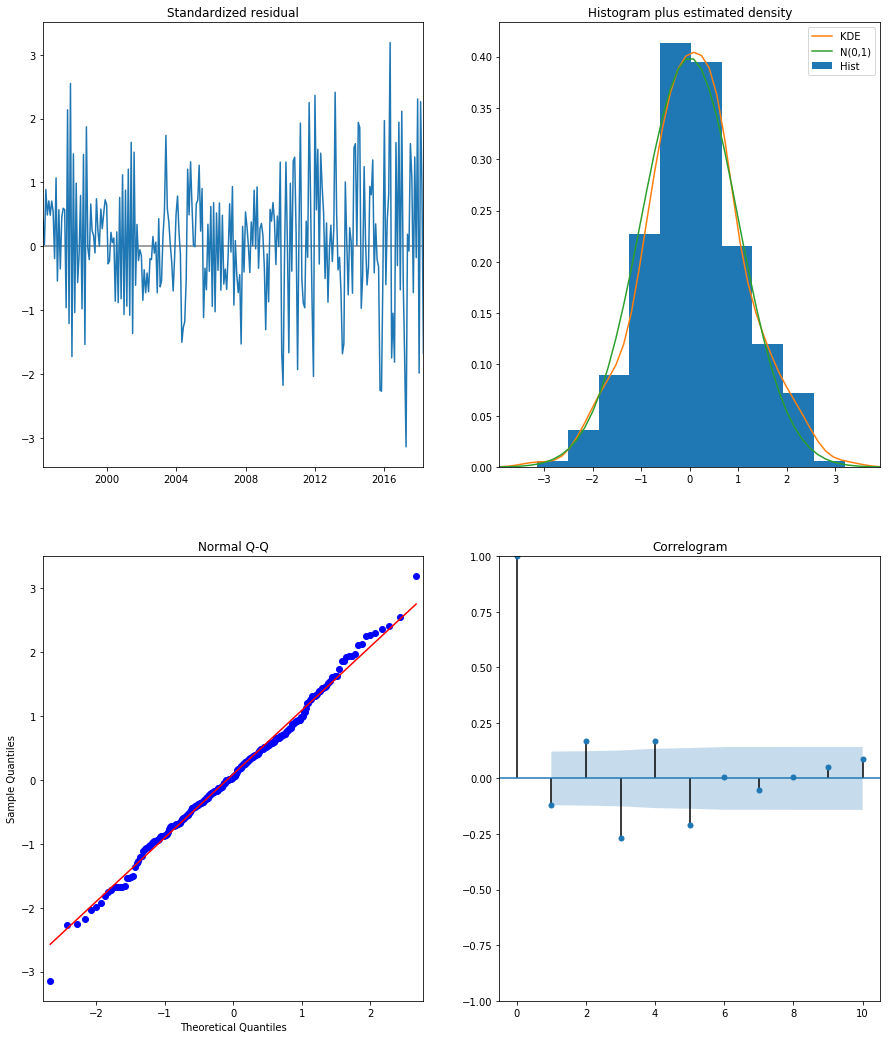

In [67]:
# Use plot_diagnostics with results calculated above.
output.plot_diagnostics(figsize=(15, 18))
plt.show()

# Step 6: Interpreting Results